In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
# 3.2.8
rf = RandomForestClassifier(n_estimators=15, max_depth=5)
rf.fit(x_train, y_train)
predictions = rf.predict(x_test)

In [ ]:
clf_rf = RandomForestClassifier()
parameters = {'n_estimators': [10, 20, 30], 'max_depth': [2, 5, 7, 10]}
grid_search_cv_clf = GridSearchCV(clf_rf, parameters, cv=5)
grid_search_cv_clf.fit(X_train, y_train)

In [ ]:
grid_search_cv_clf.best_params_
best_clf = grid_search_cv_clf.best_estimator_
best_clf.score(X_test, y_test)

In [ ]:
feature_importances = best_clf.feature_importances_
feature_importances_df = pd.DataFrame({'features': list(X_train),
                                       'feature_importances': feature_importances})
feature_importances_df.sort_values('feature_importances', ascending=False)

In [ ]:
# 3.2.13
np.random.seed(0)

rf = RandomForestClassifier(10, max_depth=5)
rf.fit(x_train, y_train)
imp = pd.DataFrame(rf.feature_importances_, index=x_train.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))

In [33]:
# 3.5.3
training_mush = pd.read_csv('data/training_mush.csv')
clf_rf = RandomForestClassifier(random_state=0)
parameters = {'n_estimators': range(10, 51, 10),
              'max_depth': range(1, 13, 2),
              'min_samples_leaf': range(1, 8),
              'min_samples_split': range(2, 10, 2),}
X_train = training_mush.iloc[:, 0:22]
y_train = training_mush['class']


In [ ]:
grid_search_cv_clf = GridSearchCV(clf_rf, parameters, cv=3, n_jobs=-1)
grid_search_cv_clf.fit(X=X_train, y=y_train)

In [36]:
print(grid_search_cv_clf.best_params_)
grid_search_cv_clf.best_estimator_.score(X_train, y_train)

{'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}


1.0

<Axes: >

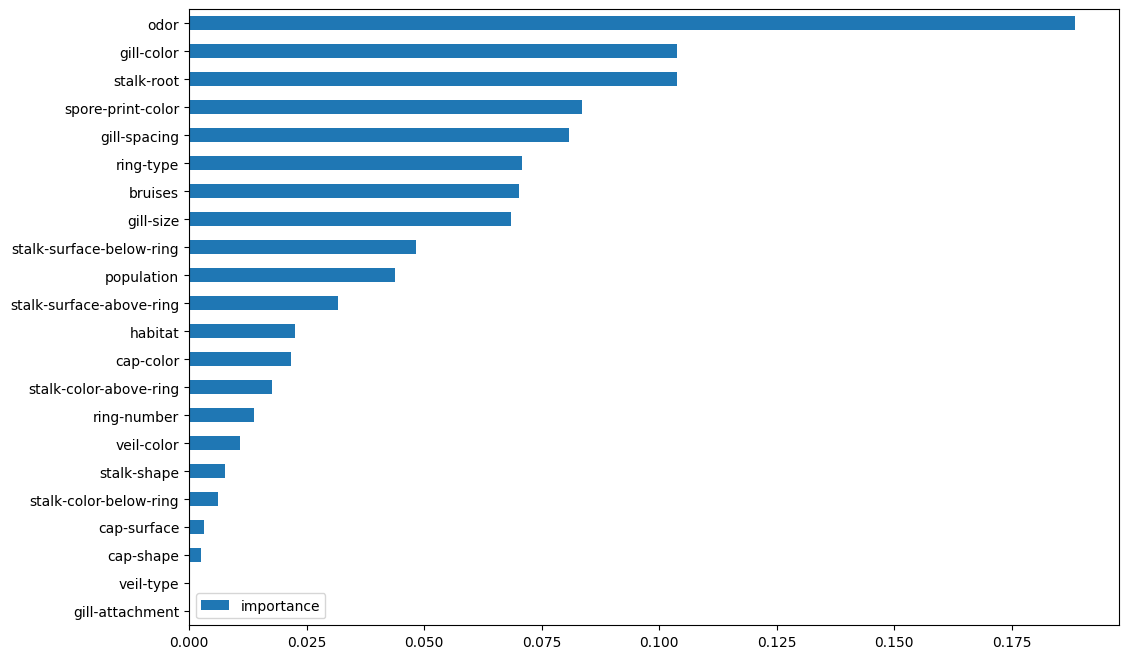

In [38]:
# 3.5.4
imp = pd.DataFrame(grid_search_cv_clf.best_estimator_.feature_importances_, index=X_train.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))


In [50]:
# 3.5.5
X_test = pd.read_csv('data/testing_mush.csv')
predictions = grid_search_cv_clf.best_estimator_.predict(X_test)
sum(predictions)


976

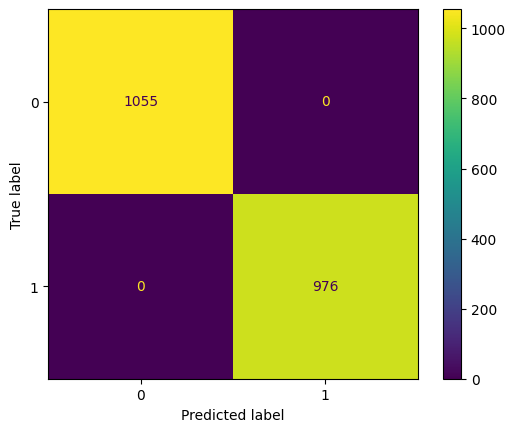

In [53]:
# 3.5.6
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_test = pd.read_csv('data/testing_y_mush.csv')
ConfusionMatrixDisplay(confusion_matrix(y_test, predictions)).plot()

In [61]:
# 3.5.7
data_inv = pd.read_csv('data/invasion.csv')
X_test = pd.read_csv('data/operative_information.csv')
y_train = data_inv.pop('class')
X_train = data_inv

In [66]:
clf_rf = RandomForestClassifier(random_state=42)
parameters = {'n_estimators': range(10, 51, 10),
              'max_depth': range(2, 10), 
              'min_samples_split': range(2, 5)}
cv_search_clf_rf = GridSearchCV(clf_rf, parameters, cv=3, n_jobs=-1)

In [76]:
cv_search_clf_rf.fit(X_train, y_train)
cv_search_clf_rf.best_params_

{'max_depth': 2, 'min_samples_split': 2, 'n_estimators': 20}

In [81]:
predictions = cv_search_clf_rf.best_estimator_.predict(X_test)
pd.DataFrame(predictions).value_counts() # 230 595 675

0        
fighter      675
transport    595
cruiser      230
Name: count, dtype: int64

<Axes: ylabel='var'>

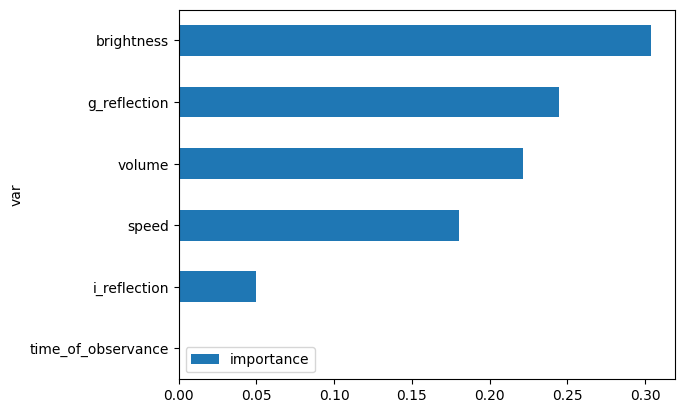

In [106]:
# 3.5.8
fi_df = pd.DataFrame({'importance': cv_search_clf_rf.best_estimator_.feature_importances_, 'var': X_train.columns})
fi_df.sort_values('importance', ascending=True).plot.barh(y='importance', x='var')
# brightness g_ref volume

In [1]:
# 3.7
import numpy as np
import pandas as pd
movie = pd.read_csv('https://github.com/DROMZEE/imdb_5000_Movie_Dataset/raw/master/data/5000_movies.csv')

In [2]:
movie.head()

,color,director_name,num_critic_for_reviews,duration,director_fb_likes,actor_3_fb_likes,actor_2_name,actor_1_fb_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_fb_likes,imdb_score,aspect_ratio,movie_fb_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [3]:
genres = movie[['movie_title', 'genres']]

In [7]:
genres.head()

,movie_title,genres
0,Avatar,Action|Adventure|Fantasy|Sci-Fi
1,Pirates of the Caribbean: At World's End,Action|Adventure|Fantasy
2,Spectre,Action|Adventure|Thriller
3,The Dark Knight Rises,Action|Thriller
4,Star Wars: Episode VII - The Force Awakens ...,Documentary


In [11]:
def reversator(value):
    return value[::-1]

In [ ]:
for row in genres.values:
    for value in row:
        print(reversator(value))

In [ ]:
for i, row in genres.iterrows():
    print(row.map(reversator))

In [ ]:
for i, col in genres.items():
    print(col.map(reversator))

In [23]:
budget = movie[['budget', 'duration']]
budget.head()

,budget,duration
0,237000000.0,178.0
1,300000000.0,169.0
2,245000000.0,148.0
3,250000000.0,164.0
4,NaN,NaN


In [24]:
budget.applymap(lambda x: x + 1)

C:\Users\ascherbo\AppData\Local\Temp\ipykernel_14964\437062998.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  budget.applymap(lambda x: x + 1)


,budget,duration
0,237000001.0,179.0
1,300000001.0,170.0
2,245000001.0,149.0
3,250000001.0,165.0
4,NaN,NaN
...,...,...
5038,NaN,88.0
5039,NaN,44.0
5040,1401.0,77.0
5041,NaN,101.0


In [25]:
budget.apply(np.mean, axis=0)

budget      3.975262e+07
duration    1.072011e+02
dtype: float64

In [26]:
budget.apply(lambda x: x+1, axis=0)

,budget,duration
0,237000001.0,179.0
1,300000001.0,170.0
2,245000001.0,149.0
3,250000001.0,165.0
4,NaN,NaN
...,...,...
5038,NaN,88.0
5039,NaN,44.0
5040,1401.0,77.0
5041,NaN,101.0


In [29]:
def mm(col):
    return np.mean(col) + 1
budget.apply(mm)

budget      3.975262e+07
duration    1.082011e+02
dtype: float64

In [30]:
budget.mean() + 1

budget      3.975262e+07
duration    1.082011e+02
dtype: float64

In [36]:
np.mean(budget['budget'].dropna().values)

39752620.436387606

In [ ]:
# 3.7.6
%%timeit
budget['budget'].mean(axis=0)

26.9 µs ± 263 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [37]:
%%timeit
budget['budget'].apply('mean')

65.5 µs ± 2.27 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [ ]:
%%timeit
budget['budget'].describe().loc['mean']

768 µs ± 8.21 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [41]:
%%timeit
budget['budget'].apply(np.mean)

25.3 ms ± 2.68 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [4]:
stock = pd.read_csv("https://raw.githubusercontent.com/PacktPublishing/Pandas-Cookbook/master/data/amzn_stock.csv",
                    index_col='Date', parse_dates=True)
stock.head()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,136.25,136.61,133.14,133.90,7600543
2010-01-05,133.43,135.48,131.81,134.69,8856456
2010-01-06,134.60,134.73,131.65,132.25,7180977
2010-01-07,132.01,132.32,128.80,130.00,11030124
2010-01-08,130.56,133.68,129.03,133.52,9833829


In [5]:
stock.index

DatetimeIndex(['2010-01-04', '2010-01-05', '2010-01-06', '2010-01-07',
               '2010-01-08', '2010-01-11', '2010-01-12', '2010-01-13',
               '2010-01-14', '2010-01-15',
               ...
               '2017-07-03', '2017-07-05', '2017-07-06', '2017-07-07',
               '2017-07-10', '2017-07-11', '2017-07-12', '2017-07-13',
               '2017-07-14', '2017-07-17'],
              dtype='datetime64[ns]', name='Date', length=1896, freq=None)

In [6]:
stock['2010-02':'2011-03']

,Open,High,Low,Close,Volume
Date,,,,,
2010-02-01,123.18,124.86,113.82,118.87,37774317
2010-02-02,118.79,118.98,114.40,118.12,23084986
2010-02-03,117.12,119.61,116.56,119.10,12409012
2010-02-04,118.64,120.33,115.74,115.94,12783912
2010-02-05,115.88,117.65,114.10,117.39,11027086
...,...,...,...,...,...
2011-03-25,171.64,173.49,170.30,170.98,4294302
2011-03-28,171.80,172.50,169.25,169.35,3400936
2011-03-29,170.73,174.84,170.07,174.62,4887443


In [13]:
stock.resample('1w').mean() # 1 week mean

C:\Users\ascherbo\AppData\Local\Temp\ipykernel_4868\586249639.py:1: FutureWarning: 'w' is deprecated and will be removed in a future version, please use 'W' instead.
  stock.resample('1w').mean()


,Open,High,Low,Close,Volume
Date,,,,,
2010-01-10,133.3700,134.564,130.8860,132.872,8900385.80
2010-01-17,129.5660,130.472,126.9940,128.252,10756782.40
2010-01-24,126.5475,128.255,123.7925,125.360,9883903.25
2010-01-31,123.5780,125.528,120.5840,122.796,18627194.20
2010-02-07,118.7220,120.286,114.9240,117.884,19415862.60
...,...,...,...,...,...
2017-06-25,1003.6940,1007.236,993.9580,999.006,3435057.40
2017-07-02,987.3720,994.062,974.0140,981.004,3719885.20
2017-07-09,967.1325,976.000,958.6025,967.240,3116265.75


In [18]:
stock.rolling(3, min_periods=1).mean()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,136.250000,136.610000,133.140000,133.900000,7.600543e+06
2010-01-05,134.840000,136.045000,132.475000,134.295000,8.228500e+06
2010-01-06,134.760000,135.606667,132.200000,133.613333,7.879325e+06
2010-01-07,133.346667,134.176667,130.753333,132.313333,9.022519e+06
2010-01-08,132.390000,133.576667,129.826667,131.923333,9.348310e+06
...,...,...,...,...,...
2017-07-11,982.516667,991.846667,978.786667,989.786667,3.057460e+06
2017-07-12,992.883333,1001.326667,988.440000,999.036667,3.379189e+06
2017-07-13,999.423333,1003.806667,992.573333,1000.423333,3.157356e+06


In [20]:
stock.expanding(3).mean()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN
2010-01-05,NaN,NaN,NaN,NaN,NaN
2010-01-06,134.760000,135.606667,132.200000,133.613333,7.879325e+06
2010-01-07,134.072500,134.785000,131.350000,132.710000,8.667025e+06
2010-01-08,133.370000,134.564000,130.886000,132.872000,8.900386e+06
...,...,...,...,...,...
2017-07-11,376.749450,380.480122,372.654524,376.793171,4.534246e+06
2017-07-12,377.079033,380.811907,372.984923,377.125827,4.533757e+06
2017-07-13,377.410364,381.142460,373.313812,377.455026,4.532884e+06


In [22]:
stock.ewm(alpha=0.7).mean() # exp weighing

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,136.250000,136.610000,133.140000,133.900000,7.600543e+06
2010-01-05,134.080769,135.740769,132.116923,134.507692,8.566630e+06
2010-01-06,134.454317,135.013597,131.781007,132.883453,7.569757e+06
2010-01-07,132.729323,133.112682,129.677262,130.848553,1.001179e+07
2010-01-08,131.207098,133.510772,129.223075,132.723121,9.886915e+06
...,...,...,...,...,...
2017-07-11,989.084881,995.142613,982.059585,992.890941,3.089057e+06
2017-07-12,997.180464,1004.527784,993.287876,1002.424282,3.452719e+06
2017-07-13,1002.388139,1006.174335,995.116363,1001.168285,3.052354e+06


<Axes: xlabel='Date'>

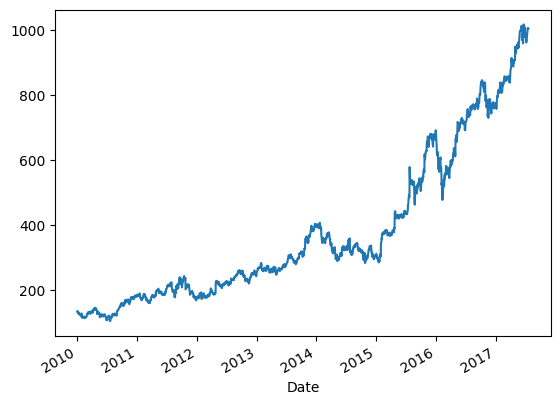

In [24]:
stock['Open'].plot()

<Axes: xlabel='Date'>

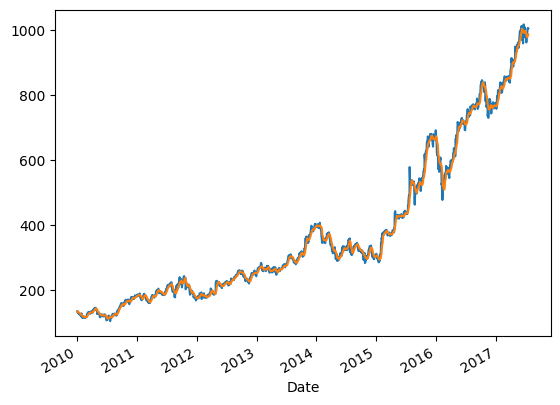

In [28]:
ns = stock['Open'].rolling(10, min_periods=1).mean()
stock['Open'].plot()
ns.plot()

In [ ]:
# 3.7.8
total_birds = wintering.expanding(min_periods=1).sum() # can do without min_periods

In [34]:
stock.index.day_name().value_counts()

Date
Wednesday    390
Tuesday      389
Thursday     382
Friday       380
Monday       355
Name: count, dtype: int64

In [40]:
stock.index.dayofyear

Index([  4,   5,   6,   7,   8,  11,  12,  13,  14,  15,
       ...
       184, 186, 187, 188, 191, 192, 193, 194, 195, 198],
      dtype='int32', name='Date', length=1896)

In [38]:
stock.index.month_name()

Index(['January', 'January', 'January', 'January', 'January', 'January',
       'January', 'January', 'January', 'January',
       ...
       'July', 'July', 'July', 'July', 'July', 'July', 'July', 'July', 'July',
       'July'],
      dtype='object', name='Date', length=1896)

In [35]:
# speed up methods suggestions
%config IPCompleter.greedy=True